# Critical Exponent Fit

In this notebook we fit power law to our transient lifetime means.

## Imports

In [1]:
# Assume we're running from project root
%cd .. 

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis


In [2]:
# Local imports
from src.transient_lifetimes import TransientLifetimeResult

# Other imports
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

## Plot/Data Locations

In [3]:
# plot_pd = Path('plots')
plot_pd = Path('/Users/cfn18/Documents/PhD-Work/Thesis/img/Tipping-Points/')
data_pd = Path('data')
config_pd = Path('cfg')

## Critical Exponent Fit

In [4]:
# Load lifetime data

csv_file = data_pd/'transient_lifetime_better_ic.csv'
new_csv_file = data_pd/'transient_lifetime_better_ic.csv'
df = pd.read_csv(new_csv_file)

sb_lifetimes = TransientLifetimeResult(df, 'sb')
w_lifetimes = TransientLifetimeResult(df, 'w')

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis/src/transient_lifetimes.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.dropna(inplace=True)
/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis/src/transient_lifetimes.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.dropna(inplace=True)


(<Figure size 401.569x248.183 with 1 Axes>,
 <AxesSubplot:title={'center':'$S_c = 14.91\\pm0.05$, $\\gamma = 6.13\\pm0.78$'}, xlabel='$\\log(|S - S_c|)$', ylabel='$\\log(\\tau)$'>)

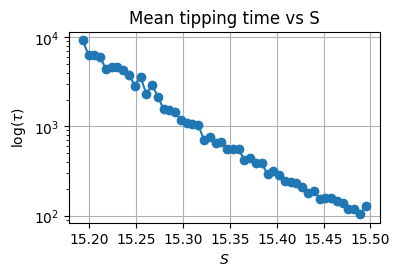

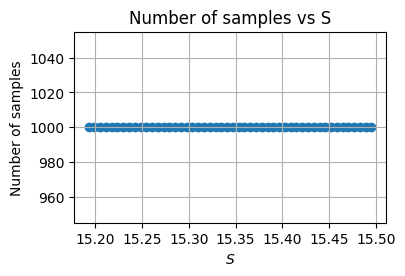

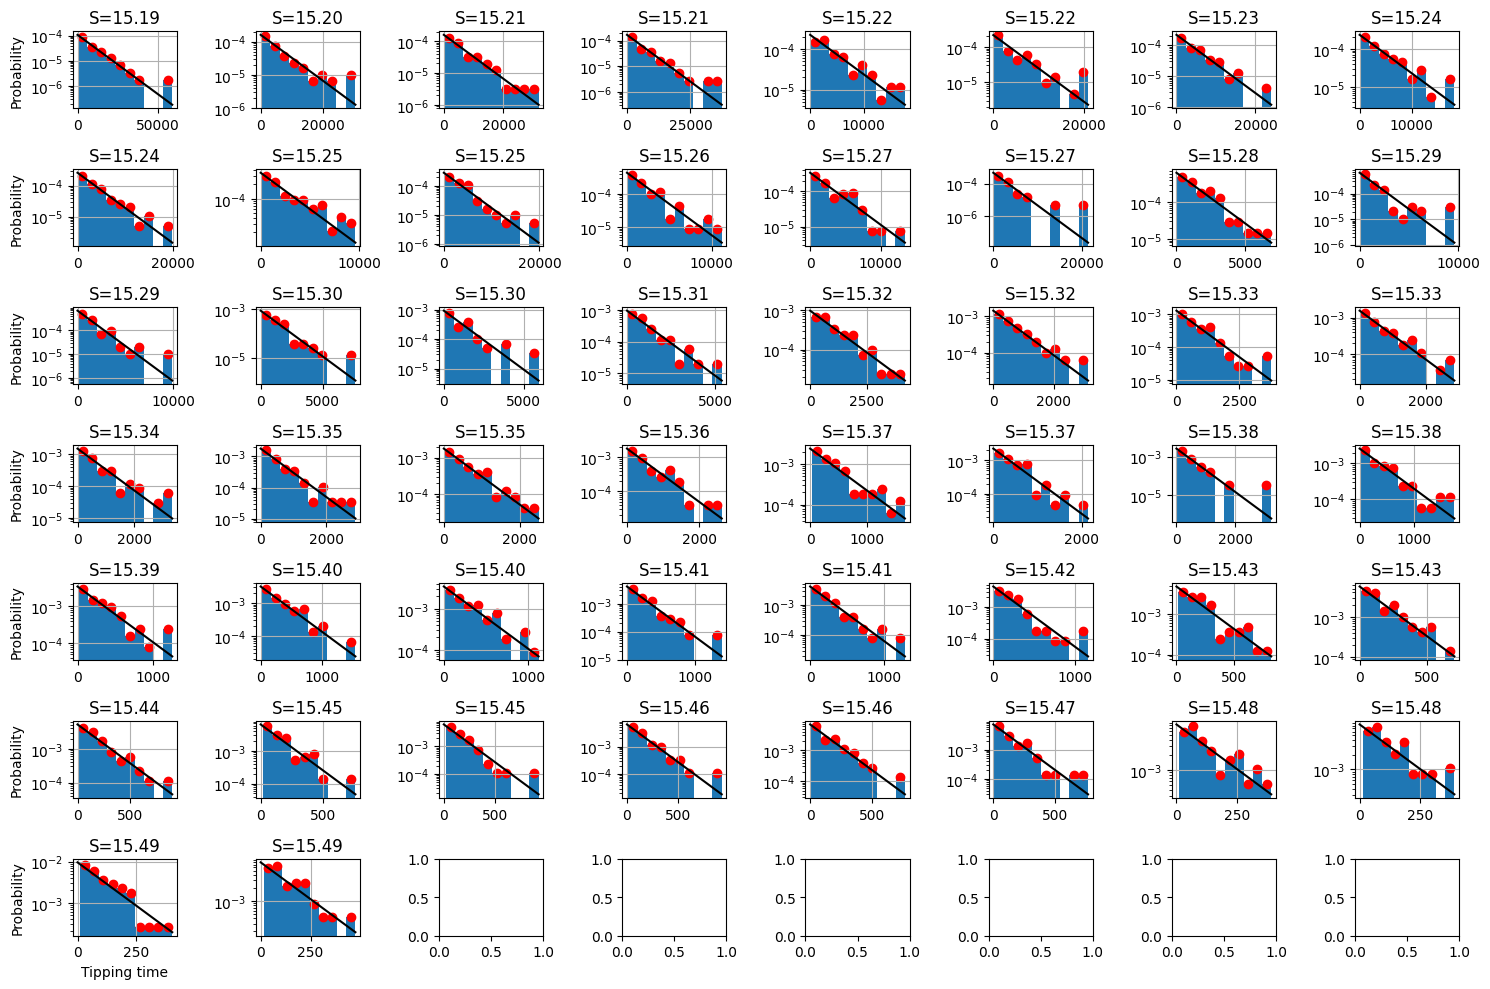

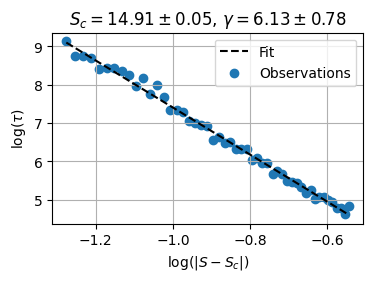

In [5]:
sb_lifetimes.plot_mean_tipping_time()
sb_lifetimes.plot_number_of_samples()
sb_lifetimes.all_tipping_time_histograms()
sb_lifetimes.plot_scaling_lawfit()

(<Figure size 401.569x248.183 with 1 Axes>,
 <AxesSubplot:title={'center':'$S_c = 7.89\\pm0.02$, $\\gamma = 6.27\\pm0.70$'}, xlabel='$\\log(|S - S_c|)$', ylabel='$\\log(\\tau)$'>)

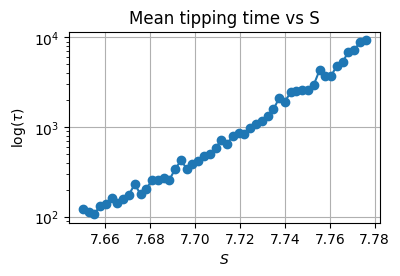

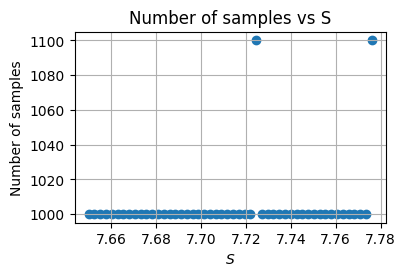

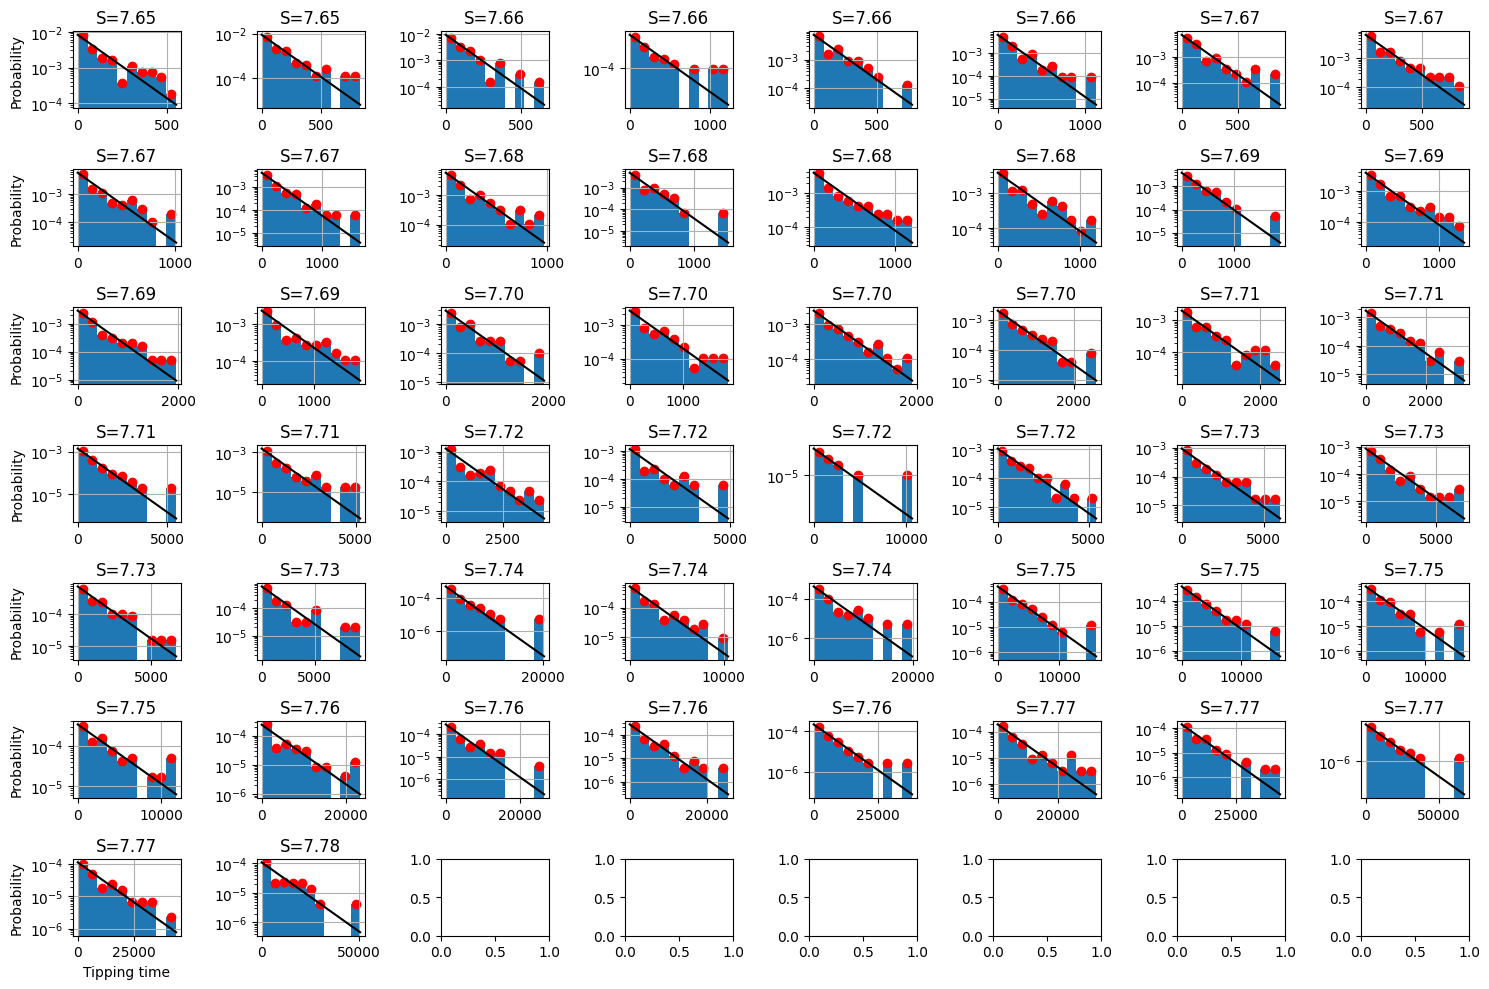

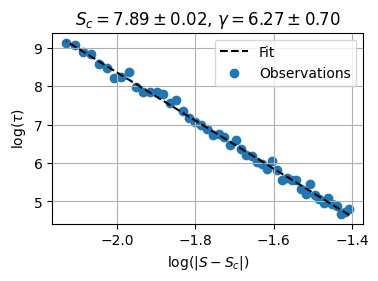

In [6]:
w_lifetimes.plot_mean_tipping_time()
w_lifetimes.plot_number_of_samples()
w_lifetimes.all_tipping_time_histograms()
w_lifetimes.plot_scaling_lawfit()

In [18]:
# See how many tipping times are the max value

print(sb_lifetimes.df['tipping_time'].max())
sb_lifetimes.df['tipping_time'].where(sb_lifetimes.df['tipping_time'] == sb_lifetimes.df['tipping_time'].max()).count()

59035.0


10

In [13]:
w_lifetimes.df.tipping_time.describe()

count    50200.000000
mean      1767.086434
std       4173.544403
min          0.250000
25%         32.750000
50%        316.500000
75%       1429.375000
max      67311.750000
Name: tipping_time, dtype: float64

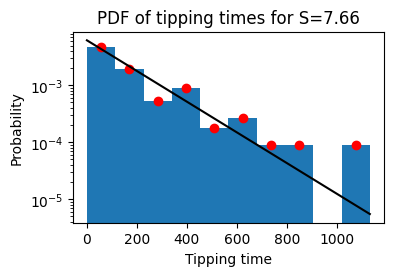

In [8]:
w_lifetimes.tipping_time_histogram_list(5)

# Estimating Range to Look at

In [9]:
min_tau = 1.e2
max_tau = 1.e4


# SB - > W
min_S = sb_lifetimes.estimate_S_from_tau(min_tau)
max_S = sb_lifetimes.estimate_S_from_tau(max_tau)
print(f'For SB to W we should look at range {min_S:.3f} to {max_S:.3f}')

# W -> SB
min_S = w_lifetimes.estimate_S_from_tau(min_tau)
max_S = w_lifetimes.estimate_S_from_tau(max_tau)
print(f'For W to SB we should look at range {min_S:.3f} to {max_S:.3f}')

For SB to W we should look at range 15.495 to 15.188
For W to SB we should look at range 7.649 to 7.777


# Print Results in Latex

In [10]:
# latex_ds = SBTransientLifetimes.mean_lifetimes()[5:].sort_values('distance_from_crit')
# latex_ds['S'] = latex_ds.index
# print(latex_ds[['S', 'distance_from_crit', 'mean_tipping_time', 'sample_size', 'standard_error']].round(decimals=2).to_latex(index=False))
# latex_ds.columns